In [1]:
import torch
import torch.nn as nn 
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset 
from torchvision.datasets import ImageFolder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [2]:
torch.manual_seed(10)

In [3]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3* 256* 256, 128)
        self.relu = nn.ReLU()
        self.fc2= nn.Linear(128,2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 3* 256 * 256)
        x= self.relu(self.fc1(x))
        x= self.softmax(self.fc2(x))
        return x


    

In [4]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

])

In [5]:
class Custom(Dataset):
    def __init__(self, root, transform=None):
        self.dataset = ImageFolder(root, transform= transform)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
       return self.dataset[idx]

In [6]:
train_dataset = Custom(root=r'C:\Users\ACER\Desktop\Pytorch_Learning\nn_with_pytorch\Flowers_Classification_dataset\train', transform=transform)
test_dataset = Custom(root=r'C:\Users\ACER\Desktop\Pytorch_Learning\nn_with_pytorch\Flowers_Classification_dataset\val', transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


In [7]:
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

epochs[50/50],Training Loss: 0.0000, Validation Loss: 0.6860
Accuracy: 0.6154, Precision: 0.6126, Recall: 0.6154, F1 Score: 0.6128


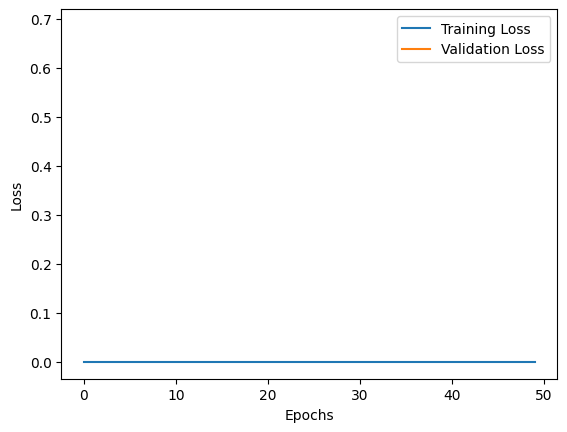

In [8]:
num_epochs= 50
train_losses =[]
valid_losses =[]

for epoch in range(num_epochs):
    model.train()
    running_loss =0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss++ loss.item()

    average_train_loss = running_loss/len(train_loader)
    train_losses.append(average_train_loss)

#model validation
model.eval()
valid_loss =0.0
with torch.no_grad():
     for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        valid_loss += loss.item()
    
average_valid_loss = valid_loss / len(test_loader)
valid_losses.append(average_valid_loss)

print(f'epochs[{epoch+1}/{num_epochs}],'
      f'Training Loss: {average_train_loss:.4f}, '
      f'Validation Loss: {average_valid_loss:.4f}')

# Evaluate the model
def evaluate_model(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

evaluate_model(model, test_loader)

# Visualize training and validation curves

plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

torch.save(model.state_dict(), 'binary_classfication_model.pth')

    